# Görev: Makine Öğrenmesi ile Metin Sınıflandırma

Bu çalışmada, haber metinlerinden oluşan bir veri kümesi üzerinde makine öğrenmesi tabanlı bir sınıflandırma sistemi geliştirilmiştir.

# Veri Seti
Veri kümesi, https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset kaynağından alınmış olup, haber başlığı ve açıklamalarından oluşmaktadır. Her metin "1-World", "2-Sports", "3-Business", "4-Sci/Tech" gibi kategorilere aittir.

# Uygulanan Ön İşlemler:
- Metinleri küçük harfe çevirme
- Noktalama işaretlerini kaldırma
- Sayıları silme
- URL silme
- Gereksiz boşlukları kaldırma
- TF-IDF ile metinlerin vektörleştirilmesi

# Kullanılan Modeller:
- Linear Support Vector Classification Model
- Naive Bayes
- Logistic Regression

# Değerlendirme:
- Doğruluk (Accuracy)
- Sınıflandırma Raporu (Precision, Recall, F1-Score)
- Karışıklık Matrisi (Confusion Matrix)

In [1]:
#kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import re
import string

In [2]:
#verileri okuma
train_df = pd.read_csv("dataset/train.csv", skiprows=1, names=["Class Index", "Title", "Description"])
test_df = pd.read_csv("dataset/test.csv", skiprows=1, names=["Class Index", "Title", "Description"])

In [3]:
#null veri var mı?
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [4]:
#veri önişlemede gürültüleri gideriyoruz
def clean_text(text):
    text = text.lower()  # küçük harfe dönüştür
    text = re.sub(r"http\S+", "", text)  # URL'leri sil
    text = re.sub(r"\d+", "", text)  # sayıları sil
    text = re.sub(r"[^\w\s]", "", text)  # noktalama işaretlerini sil
    text = re.sub(r"\s+", " ", text).strip()  # gereksiz boşlukları sil
    return text

#title ve descripionu birleştiriyoruz
train_df["Text"] = (train_df["Title"] + " " + train_df["Description"]).apply(clean_text)
test_df["Text"] = (test_df["Title"] + " " + test_df["Description"]).apply(clean_text)

In [5]:
#train ve test verilerini etiketliyoruz.
X_train = train_df["Text"]
y_train = train_df["Class Index"]
X_test = test_df["Text"]
y_test = test_df["Class Index"]

In [6]:
#TF-IDF Vektörleme
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
#linear svc modelini oluşturup eğitelim
model_linearsvc = LinearSVC()
model_linearsvc.fit(X_train_tfidf, y_train)

LinearSVC()

In [8]:
#naive bayes modelini oluşturup eğitelim
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [9]:
#logistic regression modelini oluşturup eğitelim
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

 Linear SVC - Doğruluk (Accuracy): 0.9028947368421053

 Linear SVC - Sınıflandırma Raporu:
               precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



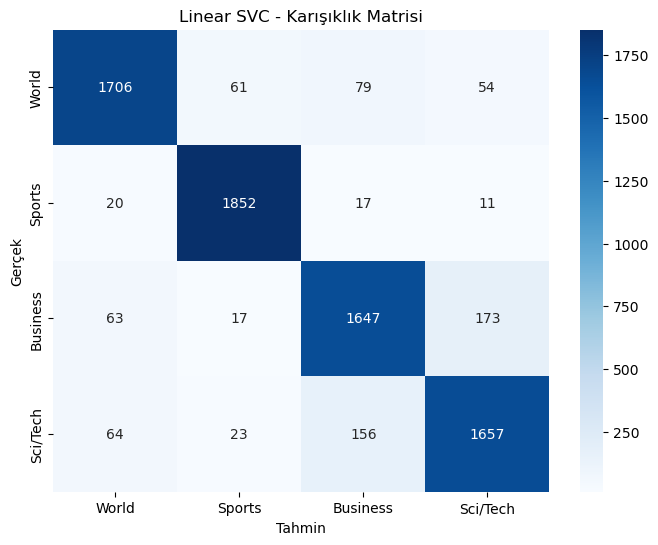

In [10]:
# linear svc modeli için tahmin ve değerlendirme yapalım
y_pred_svc = model_linearsvc.predict(X_test_tfidf)

print(" Linear SVC - Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_svc))
print("\n Linear SVC - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_svc, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title("Linear SVC - Karışıklık Matrisi")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

 Naive Bayes - Doğruluk (Accuracy): 0.8903947368421052

 Naive Bayes - Sınıflandırma Raporu:
               precision    recall  f1-score   support

       World       0.90      0.89      0.89      1900
      Sports       0.94      0.97      0.95      1900
    Business       0.86      0.84      0.85      1900
    Sci/Tech       0.86      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



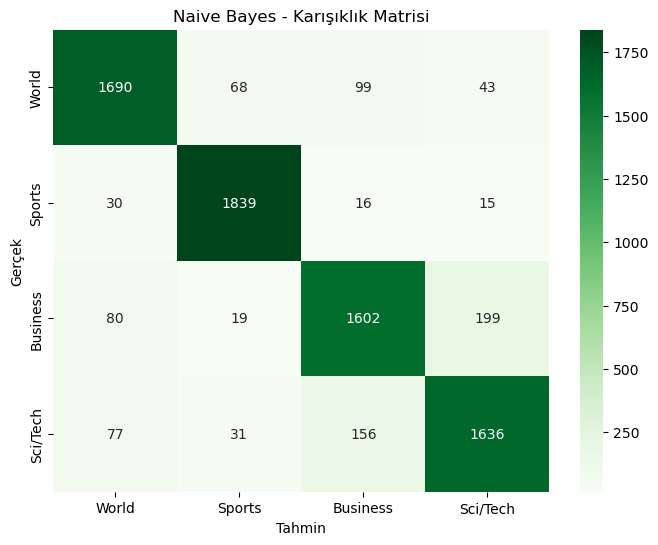

In [11]:
# naive bayes modeli için tahmin ve değerlendirme yapalım
y_pred_nb = model_nb.predict(X_test_tfidf)

print(" Naive Bayes - Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_nb))
print("\n Naive Bayes - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_nb, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title("Naive Bayes - Karışıklık Matrisi")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()


 Logistic Regression - Doğruluk (Accuracy): 0.9044736842105263

 Logistic Regression - Sınıflandırma Raporu:
               precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



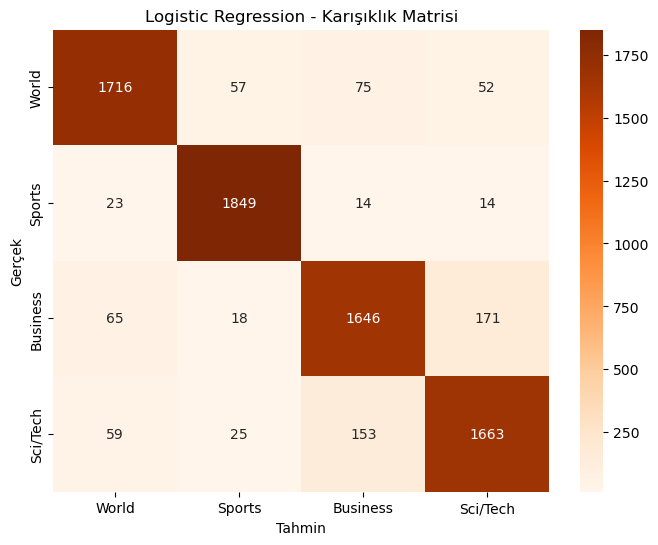

In [12]:
# logistic regression modeli için tahmin ve değerlendirme yapalım
y_pred_lr = model_logreg.predict(X_test_tfidf)

print(" Logistic Regression - Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_lr))
print("\n Logistic Regression - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_lr, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title("Logistic Regression - Karışıklık Matrisi")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### Sonuçlar:  
1- **Logistic Regression** / Başarı Oranı: %90.44  <br>
2- **Linear SVC**          / Başarı Oranı: %90.28  <br>
3- **Naive Bayes**         / Başarı Oranı: %89.03